In [60]:
import pandas as pd

In [61]:
df=pd.read_csv("wine.csv")

In [62]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [63]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [65]:
### train test split  to aviod overfitting
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(df.drop(labels=["Wine"],axis=1),df['Wine'],
                            test_size=0.3,
                        random_state=0)

In [66]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [67]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [68]:
####### determine the mutual infromation
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.41931436, 0.29414452, 0.17334776, 0.25377499, 0.18328045,
       0.48820121, 0.71450488, 0.12557552, 0.27578313, 0.61283749,
       0.55948747, 0.55328202, 0.54362919])

In [69]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.714505
Color.int               0.612837
Hue                     0.559487
OD                      0.553282
Proline                 0.543629
Phenols                 0.488201
Alcohol                 0.419314
Malic.acid              0.294145
Proanth                 0.275783
Acl                     0.253775
Mg                      0.183280
Ash                     0.173348
Nonflavanoid.phenols    0.125576
dtype: float64

<Axes: >

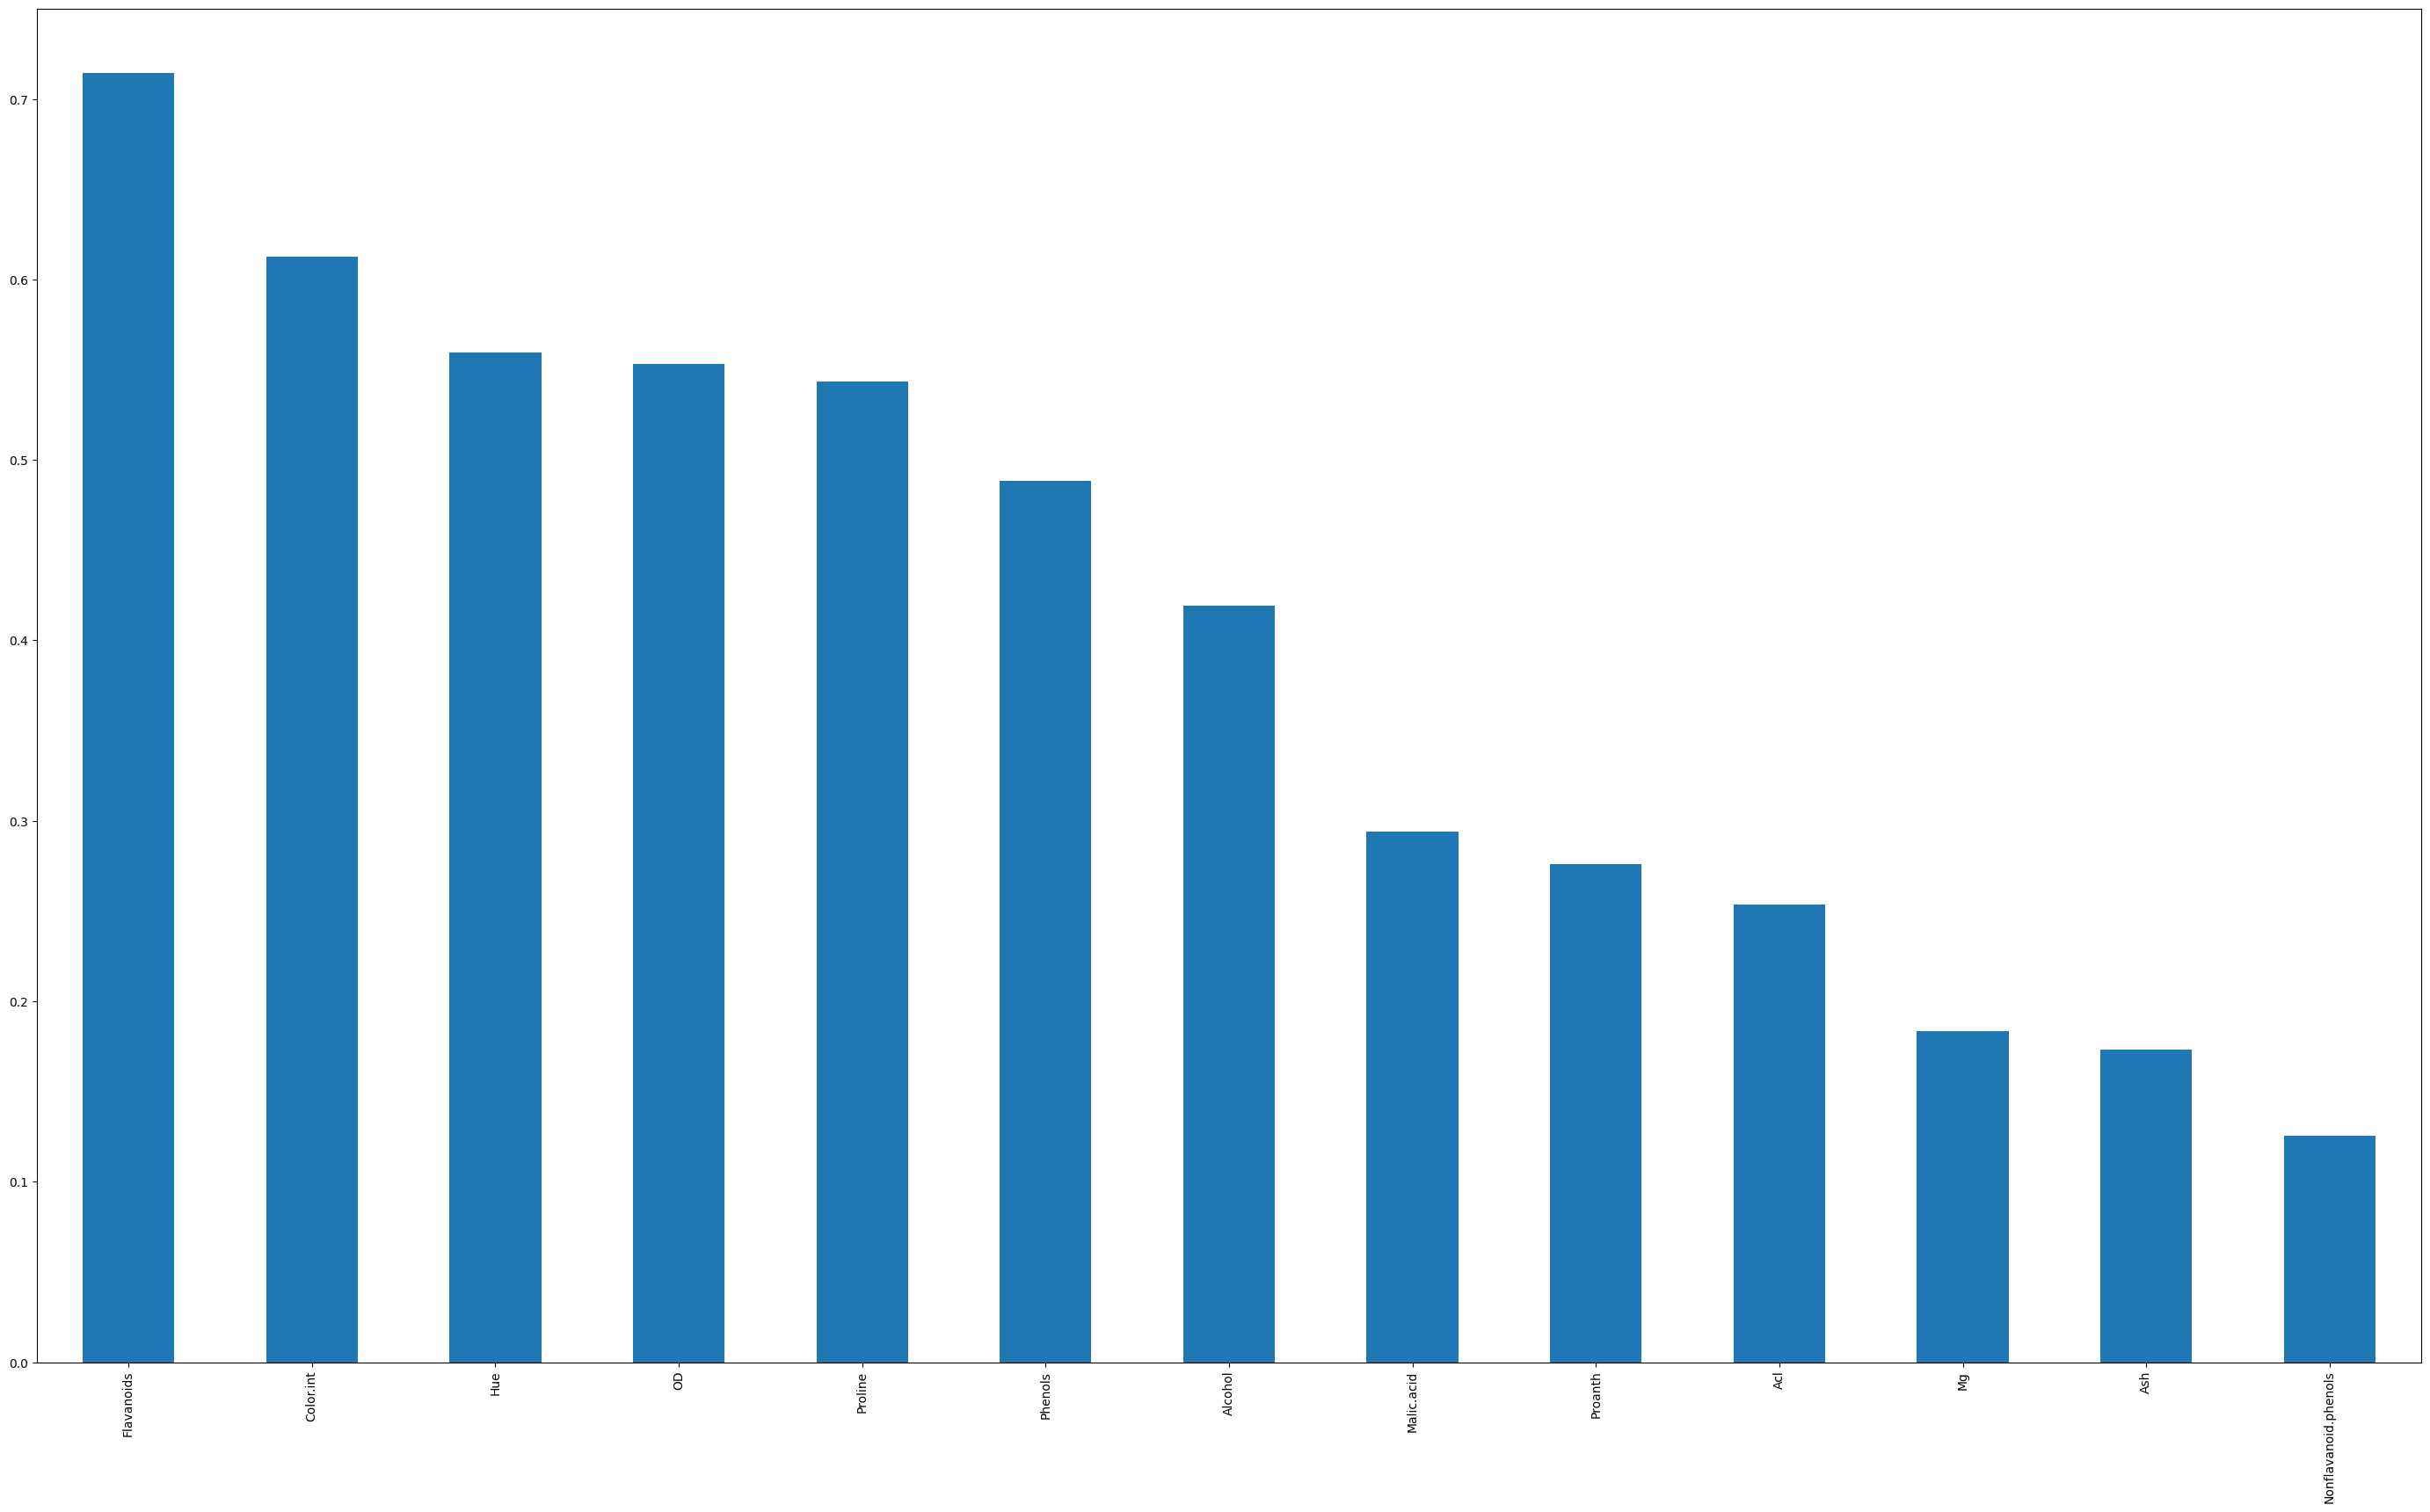

In [70]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(35,20))

In [71]:
from sklearn.feature_selection import SelectKBest

In [76]:
### no  will selection the top 5 important features
f
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(x_train ,y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [ ]:
#### house_price_advaced_regression _techniques/data

In [63]:
import pandas as pd
house_df=pd.read_csv()

In [64]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [66]:
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [67]:
numeric_list=['int16','int32','int64','float16','float32','float64']
numerical_cols=list(house_df.select_dtypes(include=numeric_list).columns)
                        

In [68]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [69]:
house_df=house_df[numerical_cols]

In [70]:
house_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [71]:
 house_df.drop("Id",axis=1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [72]:
##### it is always a good practice to split train and test data avoid
##overfiting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(house_df.drop(labels=["SalePrice"],axis=1),house_df['SalePrice'],
                                    test_size=0.3,
                                    random_state=0)

In [62]:
x_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,...,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,...,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,...,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,82.0,9430,8,5,1999,1999,673.0,1163,...,856,0,128,0,0,180,0,0,7,2009
835,836,20,60.0,9600,4,7,1950,1995,0.0,442,...,436,290,0,0,0,0,0,0,2,2010
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0,...,539,0,0,0,0,0,0,0,4,2010
559,560,120,NaN,3196,7,5,2003,2004,18.0,0,...,420,143,20,0,0,0,0,0,10,2006


In [35]:
 x_train.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [36]:
###determine the mutual information
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train.fillna(0),y_train)
mutual_info

array([0.        , 0.25952469, 0.21039429, 0.1649645 , 0.53606092,
       0.11123465, 0.34643724, 0.24282387, 0.10067043, 0.16105147,
       0.        , 0.11220655, 0.38174504, 0.30992068, 0.2277936 ,
       0.        , 0.48255696, 0.02433077, 0.        , 0.26134576,
       0.07342064, 0.04747661, 0.02322612, 0.17934233, 0.17888217,
       0.26900411, 0.39129979, 0.36480845, 0.0698195 , 0.16658025,
       0.01808966, 0.00973907, 0.02234936, 0.0025975 , 0.00321618,
       0.        , 0.        ])

In [37]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.536061
GrLivArea        0.482557
GarageCars       0.391300
TotalBsmtSF      0.381745
GarageArea       0.364808
YearBuilt        0.346437
1stFlrSF         0.309921
GarageYrBlt      0.269004
FullBath         0.261346
MSSubClass       0.259525
YearRemodAdd     0.242824
2ndFlrSF         0.227794
LotFrontage      0.210394
TotRmsAbvGrd     0.179342
Fireplaces       0.178882
OpenPorchSF      0.166580
LotArea          0.164964
BsmtFinSF1       0.161051
BsmtUnfSF        0.112207
OverallCond      0.111235
MasVnrArea       0.100670
HalfBath         0.073421
WoodDeckSF       0.069820
BedroomAbvGr     0.047477
BsmtFullBath     0.024331
KitchenAbvGr     0.023226
ScreenPorch      0.022349
EnclosedPorch    0.018090
3SsnPorch        0.009739
MiscVal          0.003216
PoolArea         0.002598
MoSold           0.000000
Id               0.000000
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
BsmtFinSF2       0.000000
YrSold           0.000000
dtype: float64

<Axes: >

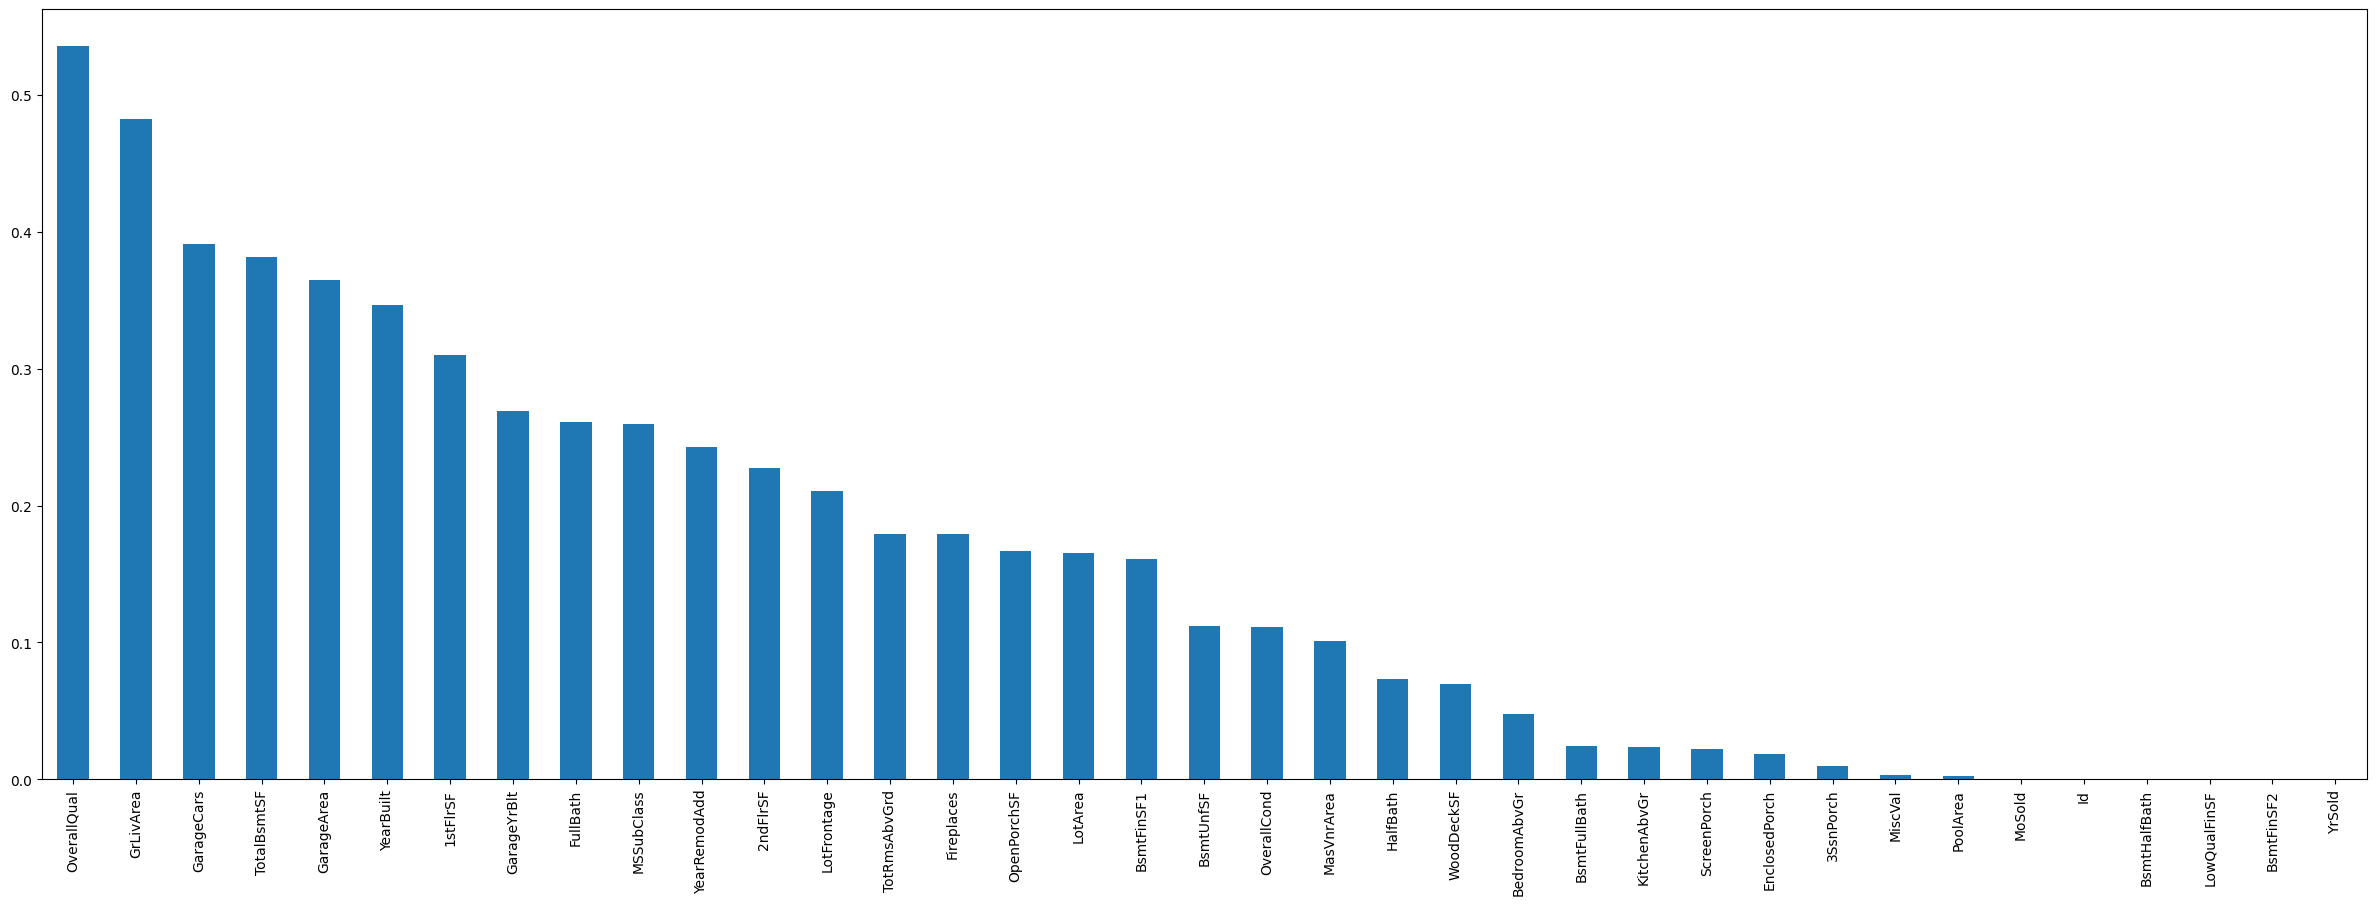

In [42]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,10))

In [44]:
  from sklearn.feature_selection import SelectPercentile

In [48]:
## selection the top 20 percentile
selection_top_columns=SelectPercentile(mutual_info_regression,percentile=20)
selection_top_columns.fit(x_train.fillna(0),y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001A688D0B7E0>)

In [50]:
selection_top_columns.get_support()

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [51]:
x_train.columns[selection_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [106]:
import seaborn as sns
df=sns.load_dataset("titanic")

In [107]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [109]:
### ['sex','embarked',"alone",'pclass','survived']
df=df[['sex','embarked',"alone",'pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [110]:

import numpy as np
### let;s perfrom label encoding on sex column
df["sex"]=np.where(df['sex']=='male',1,0)
#### let's perform label encodeing on embarked
ordinal_label={k:i for i,k in enumerate(df['embarked'].unique(),0)}
df['embarked']=df['embarked'].map(ordinal_label)

In [111]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [112]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [113]:
### let;s perfrom label encoding on alone column
df["alone"]=np.where(df['alone']==True,1,0)

In [114]:
  df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [123]:
### train test split is usually donr to avioid overfitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                                        df['survived'],test_size=0.3,random_state=100) 

In [124]:
x_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [125]:
x_train.isna().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [126]:
## perfromchi2 test
### chi2 return 2 values
## fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x_train,y_train)

In [127]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [128]:
p_values=pd.Series(f_p_values[1])
p_values.index=x_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [129]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

In [ ]:
### observation
sex columns is the mostimportance columns when compared 